# Finchat: Statistics

See detailed information and the labels for the data and columns from the readme file.

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [163]:
# Loading the corpus
chat_data = pd.read_csv('data/finchat_200306.csv')
meta_data = pd.read_csv('data/meta_data_200304.csv')

In [164]:
chat_data.dtypes

CHAT_ID        int64
SPEAKER_ID     int64
TIME          object
TEXT          object
dtype: object

In [165]:
meta_data.dtypes

CHAT_ID        int64
SPEAKER_ID     int64
GROUP          int64
TOPIC         object
OFFTOPIC      object
Q1             int64
Q2             int64
Q3             int64
Q4             int64
Q5             int64
dtype: object

The number of conversation and participants.

In [379]:
print('The number of the conversations:')
print(chat_data['CHAT_ID'].unique().size)
print(meta_data['CHAT_ID'].unique().size)
print('The number of the users:')
print(chat_data['SPEAKER_ID'].unique().size)

The number of the conversations:
86
85
The number of the users:
64


## Topic and group statistics

In [166]:
# Changing types
meta_data["GROUP"] = meta_data["GROUP"].astype('category')
meta_data["TOPIC"] = meta_data["TOPIC"].astype('category')
meta_data["OFFTOPIC"] = meta_data["OFFTOPIC"].astype('category')
meta_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']] = meta_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].astype('category')

In [167]:
print('groups')
print(meta_data["GROUP"].value_counts())
print()

print('topics')
print(meta_data["TOPIC"].value_counts())
print()

print('offtopics')
print(meta_data["OFFTOPIC"].value_counts())
print()


groups
1    82
3    61
2    20
Name: GROUP, dtype: int64

topics
sports        44
literature    31
tv            24
traveling     24
food          18
movies        14
music          8
Name: TOPIC, dtype: int64

offtopics
0                137
school            12
jokes              4
miscellaneous      3
career             3
literature         2
technology         1
sports             1
Name: OFFTOPIC, dtype: int64



In [168]:
# del
#sns.catplot(x="answer", hue="question", kind="count", data=dataset);

NameError: name 'dataset' is not defined

## Filter into smaller sets
Choose only specific user group or topic to analyze.

In [187]:
# Filter by topic
#meta_subset = meta_data.loc[meta_data['TOPIC'] == 'tv']
#chat_id_list = meta_subset['CHAT_ID'].tolist()
#chat_subset = chat_data.loc[chat_data['CHAT_ID'].isin(chat_id_list)]

# Filter by group
# University staff = 1, university student = 2, high schooler = 3
#meta_subset = meta_data.loc[meta_data['GROUP'] == 3]
#chat_id_list = meta_subset['CHAT_ID'].tolist()
#chat_subset = chat_data.loc[chat_data['CHAT_ID'].isin(chat_id_list)]

# Everything: No subset
chat_id_list = meta_data['CHAT_ID'].tolist()
meta_subset = meta_data
chat_subset = chat_data

## Clean text

In [173]:
# Clean text from commas etc to compute word statistics
sentences = chat_subset['TEXT'].tolist()

sentences_clean = []
word_list_text = ''
for sentence in sentences:
    for ch in ['.','!','?',')','(',':',',']:
        if ch in sentence:
            sentence = sentence.replace(ch,'')
    
    sentences_clean.append(sentence.lower())
    word_list_text = word_list_text+" "+sentence.lower()
    
word_list = word_list_text.split()


## Words

### Common words

In [177]:
word_count = Counter(word_list).most_common()
#print(word_count)

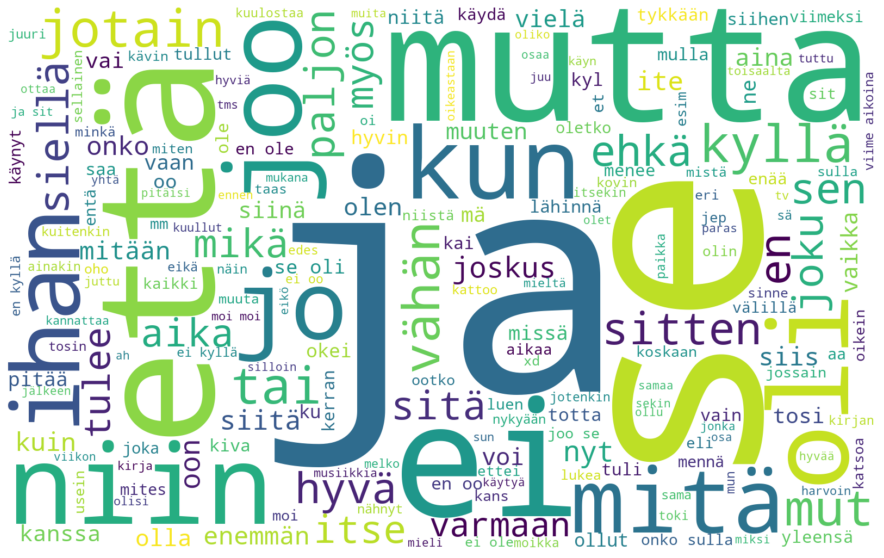

<Figure size 720x720 with 0 Axes>

In [178]:
# Generate a word cloud image
stopwords=[]
wordcloud = WordCloud(background_color="white", width=1600, height=1000).generate(word_list_text)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

### Word length

In [180]:
# Word lengths
word_lengths = [] #np.zeros(30)
for word in word_list:
    #ord_lengths[len(word)] += 1
    word_lengths.append(len(word))
    if len(word) > 25: print(word)

#plt.hist(word_lengths, bins=range(20))
#plt.xticks(range(20))
#plt.xlabel('word length')
#plt.ylabel('word count')
#plt.title('word lengths in corpus')
print('')
print('average word length:', np.mean(word_lengths))

vakavalla/draama-osastolla
kiinnostavammaksi/syvemmäksi
stuck_out_tongue_winking_eye
murhamysteeri-tosi-tv-juttuja
kauppakassilla/työmatkapyörällä
https//wwwhelmetfi/fi-fi/tapahtumat_ja_vinkit/vinkit/kirjastossako_lautapeleja_kylla_vain41415

average word length: 5.979448818897637


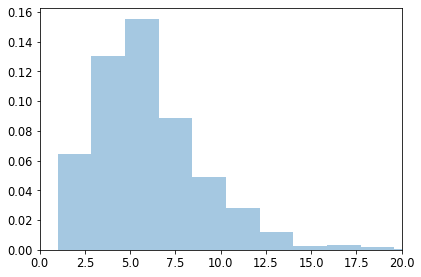

In [181]:
# Word length distribution
sns.distplot(word_lengths, kde=False, norm_hist=True);
plt.xlim(0, 20)
plt.tight_layout()

## Statistics

### Turns per conversation

In [174]:
# for each conversation
    # see how many times the speaker id changes

turn_counter = np.zeros(len(chat_id_list))
for i in range(len(chat_id_list)):
    chat = chat_data.loc[chat_data['CHAT_ID'] == chat_id_list[i]]
    speaker_id_list = chat['SPEAKER_ID'].tolist()
    prev_id = 0
    for j in speaker_id_list:
        if prev_id != j:
            turn_counter[i] += 1
            prev_id = j
    turn_counter[i] = np.floor(turn_counter[i]/2)

print(np.mean(turn_counter))

### Words in corpus

In [182]:
# Words in corpus
len(word_list)

12700

### Characters in corpus

In [184]:
total_char = 0
for word in word_list:
    total_char += len(word)
print(total_char)

75939


### Messages in corpus

In [185]:
print(len(sentences))

1526


### Conversations


In [188]:
print('The number of the conversations:')
print(chat_subset['CHAT_ID'].unique().size)

The number of the conversations:
86


## Questionaire scores
Analyze questionaire scores. 

See readme documentation of the corpus for actual questions.

In [190]:
# Answers for each question
print(meta_subset["Q1"].value_counts())
print(meta_subset["Q2"].value_counts())
print(meta_subset["Q3"].value_counts())
print(meta_subset["Q4"].value_counts())
print(meta_subset["Q5"].value_counts())

1    120
2     43
Name: Q1, dtype: int64
1    157
2      6
Name: Q2, dtype: int64
1    128
2     35
Name: Q3, dtype: int64
3    92
1    33
2    22
0    16
Name: Q4, dtype: int64
3    97
1    35
0    16
2    15
Name: Q5, dtype: int64


### The rate of interesting conversations

In [191]:
print(meta_subset["Q1"].value_counts()/sum(meta_subset["Q1"].value_counts()))

1    0.736196
2    0.263804
Name: Q1, dtype: float64


In [192]:
# All Questions
print(meta_subset["Q1"].value_counts()/sum(meta_subset["Q1"].value_counts()))
print(meta_subset["Q2"].value_counts()/sum(meta_subset["Q2"].value_counts()))
print(meta_subset["Q3"].value_counts()/sum(meta_data["Q3"].value_counts()))
print(meta_subset["Q4"].value_counts(sort=False)/sum(meta_subset["Q4"].value_counts()))
print(meta_subset["Q5"].value_counts(sort=False)/sum(meta_subset["Q5"].value_counts()))

1    0.736196
2    0.263804
Name: Q1, dtype: float64
1    0.96319
2    0.03681
Name: Q2, dtype: float64
1    0.785276
2    0.214724
Name: Q3, dtype: float64
0    0.098160
1    0.202454
2    0.134969
3    0.564417
Name: Q4, dtype: float64
0    0.098160
1    0.214724
2    0.092025
3    0.595092
Name: Q5, dtype: float64


### Pie plots

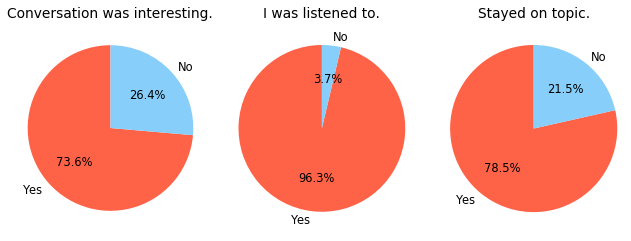

In [193]:
# Pie charts for question Q1-Q3.
# For whole data set. Change meta_data -> meta_subset if want to plot for filtered subset.

######## Q1

# Pie chart
labels = ['Yes', 'No']
sizes = np.array(meta_data["Q1"].value_counts())
#colors
colors = ['#ff9999','#66b3ff']
colors = ['tomato','lightskyblue']

#explsion
explode = (0.05,0.05)
 
fig1, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(9,3.5))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

ax1.set_title('Conversation was interesting.')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
#plt.show()

######## Q2
sizes2 = np.array(meta_data["Q2"].value_counts())

ax2.pie(sizes2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

ax2.set_title('I was listened to.')

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
#plt.show()

######## Q3
sizes3 = np.array(meta_data["Q3"].value_counts())

ax3.pie(sizes3, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

ax3.set_title('Stayed on topic.')

# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal')  
plt.tight_layout()


# Save plot
#plt.savefig('figs/q1_q2_q3_pie.png', bbox_inches='tight', dpi=300)

### More details

In [142]:
# Adding disagreement

# Q1

diff_list = []
pos_sum = 0 # both thought interesting
neg_sum = 0 # both thought not interesting
diff_sum = 0 # # disagreement
no_fb = 0
for chatid in chat_id_list:
    meta_conv = meta_data.loc[meta_data['CHAT_ID'] == chatid] 
    #meta_conv = meta_data.loc[meta_data['CHAT_ID'].isin(chatid)]
    
    # Q1
    scores = meta_conv['Q1'].tolist()
    if len(scores) == 2:
        diff_list.append(abs(scores[0]-scores[1]))
        if scores[0] + scores[1] == 2:
            pos_sum += 1
        elif scores[0] + scores[1] == 4:
            neg_sum += 1
        else:
            diff_sum += 1
    else: 
        #print(scores)
        no_fb += 1
            

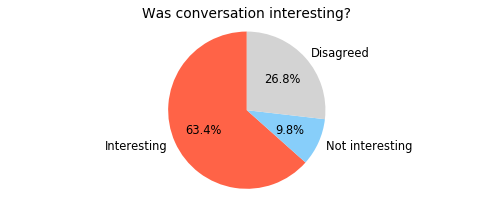

In [143]:
# Participants who both agreed that conversation vas intresting or not interesting.
#print(1-sum(diff_list)/len(diff_list))

#print('interesting')
#print(pos_sum/(pos_sum+neg_sum+diff_sum))
#print('not interesting')
#print(neg_sum/(pos_sum+neg_sum+diff_sum))
#print('disagreement')
#print(diff_sum/(pos_sum+neg_sum+diff_sum))

labels = ['Interesting', 'Not interesting', 'Disagreed']
sizes = np.array([pos_sum, neg_sum, diff_sum])
colors = ['tomato', 'lightskyblue','lightgray']

fig1, ax1 = plt.subplots(1,1, figsize=(7,3))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Was conversation interesting?')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

#plt.savefig('figs/q1_pie_wdis_staff.png', bbox_inches='tight', dpi=300)

In [107]:
# Similarties between answers for Q4 and Q5

q4_q5_same_sum = 0
q4_q5_notsame_sum = 0

q4_agreed_i = 0 # individual
q4_agreed_b = 0 # both
q4_disa_i = 0
q4_disa_b = 0
q4_disa = 0

q5_agreed_i = 0 # individual
q5_agreed_b = 0 # both
q5_disa = 0

pos_sun = 0
diff_sum = 0
count=0
for chatid in chat_id_list:
    # Q4 and Q5 have same answer for same person
    meta_conv = meta_data.loc[meta_data['CHAT_ID'] == chatid] 
    scores_q4 = meta_conv['Q4'].tolist()
    scores_q5 = meta_conv['Q5'].tolist()
    
    if len(scores_q4) == 2:
        if scores_q4[0] == scores_q5[0]:
            q4_q5_same_sum += 1
        else: q4_q5_notsame_sum += 1
        if scores_q4[1] == scores_q5[1]:
            q4_q5_same_sum += 1
        else: q4_q5_notsame_sum += 1
        
    
        # For same conversation both agreed with the leader:
        # answers 1, 2 OR 3, 3. Q4
        if scores_q4[0] != scores_q4[1] and scores_q4[0] != 3 and scores_q4[1] != 3:
            q4_agreed_i += 1
        elif scores_q4[0] == scores_q4[1] and scores_q4[0] == 3:
            q4_agreed_b += 1
        elif scores_q4[0] != scores_q4[1] and (scores_q4[0] == 3 or scores_q4[1] == 3):
            q4_disa_b += 1
        else: q4_disa += 1
            
        # For same conversation both agreed with the leader:
        # answers 1, 2 OR 3, 3. Q5
        if scores_q5[0] != scores_q5[1] and scores_q5[0] != 3 and scores_q5[1] != 3:
            q5_agreed_i += 1
        elif scores_q5[0] == scores_q5[1] and scores_q5[0] == 3:
            q5_agreed_b += 1
        else: q5_disa += 1
    else: count+=1
        

print('Asking more question and leading conversation (own opinion)')
print(q4_q5_same_sum/(q4_q5_same_sum+q4_q5_notsame_sum))
print('Agreeing who is asking the questions (Q4)')
print((q4_agreed_b+q4_agreed_i)/(q4_agreed_i+q4_agreed_b+q4_disa))
print('Agreeing who is the leader (5)')
print((q5_agreed_i+q5_agreed_b)/(q5_agreed_i+q5_agreed_b+q5_disa))

Asking more question and leading conversation (own opinion)
0.631578947368421
Agreeing who is asking the questions (Q4)
1.0
Agreeing who is the leader (5)
0.5263157894736842


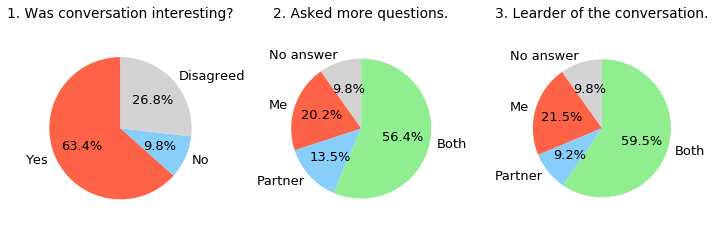

In [161]:
# Plots with disagreement and no answers.

# Combine

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 11.5}

plt.rc('font', **font)


######## Q1



#explsion
explode = (0.05,0.05)
 
fig1, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(10,3.5))



labels = ['Yes', 'No', 'Disagreed']
sizes = np.array([pos_sum, neg_sum, diff_sum])
colors = ['tomato', 'lightskyblue','lightgray']

ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 13})
ax1.set_title('1. Was conversation interesting?')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

# Q4 & Q5

# Pie chart
labels = ['No answer', 'Me', 'Partner', 'Both']
sizes = np.array(meta_data["Q4"].value_counts(sort=False))
#colors
#colors = ['#ff9999','#66b3ff']
colors = ['lightgray', 'tomato','lightskyblue','lightgreen']

ax2.set_title('2. Asked more questions.')
ax2.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,  textprops={'fontsize': 13})


# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
#plt.show()

##### Q5
sizes2 = np.array(meta_data["Q5"].value_counts(sort=False))
ax3.pie(sizes2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,  textprops={'fontsize': 13})

ax3.set_title('3. Learder of the conversation.')

# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal')  
plt.tight_layout()


#axs[1, 2].axis('off')

plt.savefig('figs/questionnairre_pies_smaller.png', bbox_inches='tight', dpi=300)




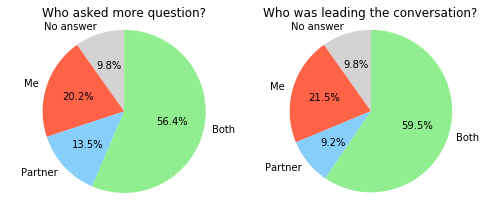

In [463]:
# Pie plots for Q4 & Q5
# For whole set. Change meta_data -> meta_subset if want to plot for subset.


# Pie chart
labels = ['No answer', 'Me', 'Partner', 'Both']
sizes = np.array(meta_data["Q4"].value_counts(sort=False))
#colors
#colors = ['#ff9999','#66b3ff']
colors = ['lightgray', 'tomato','lightskyblue','lightgreen']
 
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

ax1.set_title('Who asked more question?')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
#plt.show()

##### Q5
sizes2 = np.array(meta_data["Q5"].value_counts(sort=False))
ax2.pie(sizes2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

ax2.set_title('Who was leading the conversation?')

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()


# Save plot
#plt.savefig('figs/q4_q5_pie.png', bbox_inches='tight', dpi=300)


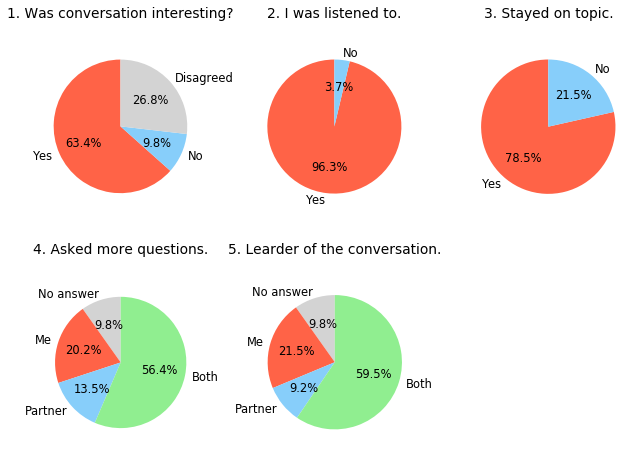

In [52]:
# Combined plots.

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 11.5}

plt.rc('font', **font)


######## Q1



#explsion
explode = (0.05,0.05)
 
fig1, axs = plt.subplots(2,3, figsize=(9,7))


labels = ['Yes', 'No', 'Disagreed']
sizes = np.array([pos_sum, neg_sum, diff_sum])
colors = ['tomato', 'lightskyblue','lightgray']

axs[0, 0].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axs[0, 0].set_title('1. Was conversation interesting?')
# Equal aspect ratio ensures that pie is drawn as a circle
axs[0, 0].axis('equal')  
plt.tight_layout()

######## Q2
# Pie chart
labels = ['Yes', 'No']
#colors
colors = ['#ff9999','#66b3ff']
colors = ['tomato','lightskyblue']

sizes2 = np.array(meta_data["Q2"].value_counts())

axs[0, 1].pie(sizes2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

axs[0, 1].set_title('2. I was listened to.')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[0, 1].axis('equal')  
plt.tight_layout()
#plt.show()

######## Q3
sizes3 = np.array(meta_data["Q3"].value_counts())

axs[0, 2].pie(sizes3, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

axs[0, 2].set_title('3. Stayed on topic.')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[0, 2].axis('equal')  
plt.tight_layout()

# Q4 & Q5

# Pie chart
labels = ['No answer', 'Me', 'Partner', 'Both']
sizes = np.array(meta_data["Q4"].value_counts(sort=False))
#colors
#colors = ['#ff9999','#66b3ff']
colors = ['lightgray', 'tomato','lightskyblue','lightgreen']

axs[1, 0].set_title('4. Asked more questions.')
axs[1, 0].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)


# Equal aspect ratio ensures that pie is drawn as a circle
axs[1, 0].axis('equal')  
plt.tight_layout()
#plt.show()

##### Q5
sizes2 = np.array(meta_data["Q5"].value_counts(sort=False))
axs[1, 1].pie(sizes2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

axs[1, 1].set_title('5. Learder of the conversation.')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[1, 1].axis('equal')  
plt.tight_layout()


axs[1, 2].axis('off')

plt.savefig('figs/questionnairre_pies.png', bbox_inches='tight', dpi=300)



(0.0, 1.0, 0.0, 1.0)

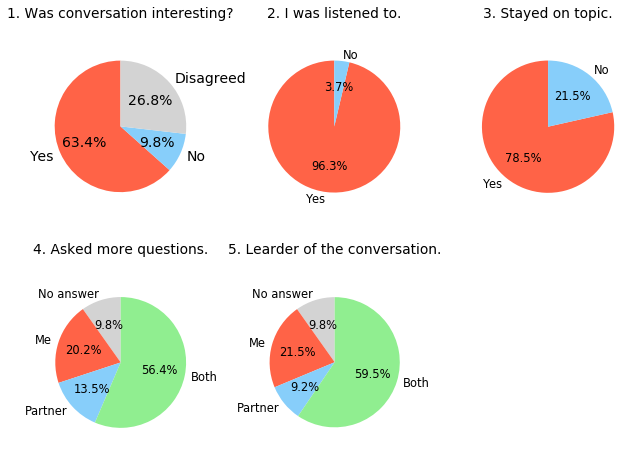

In [144]:
# Combine

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 11.5}

plt.rc('font', **font)


######## Q1



#explsion
explode = (0.05,0.05)
 
fig1, axs = plt.subplots(2,3, figsize=(9,7))


labels = ['Yes', 'No', 'Disagreed']
sizes = np.array([pos_sum, neg_sum, diff_sum])
colors = ['tomato', 'lightskyblue','lightgray']

axs[0, 0].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axs[0, 0].set_title('1. Was conversation interesting?')
# Equal aspect ratio ensures that pie is drawn as a circle
axs[0, 0].axis('equal')  
plt.tight_layout()

######## Q2
# Pie chart
labels = ['Yes', 'No']
#colors
colors = ['#ff9999','#66b3ff']
colors = ['tomato','lightskyblue']

sizes2 = np.array(meta_data["Q2"].value_counts())

axs[0, 1].pie(sizes2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

axs[0, 1].set_title('2. I was listened to.')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[0, 1].axis('equal')  
plt.tight_layout()
#plt.show()

######## Q3
sizes3 = np.array(meta_data["Q3"].value_counts())

axs[0, 2].pie(sizes3, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

axs[0, 2].set_title('3. Stayed on topic.')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[0, 2].axis('equal')  
plt.tight_layout()

# Q4 & Q5

# Pie chart
labels = ['No answer', 'Me', 'Partner', 'Both']
sizes = np.array(meta_data["Q4"].value_counts(sort=False))
#colors
#colors = ['#ff9999','#66b3ff']
colors = ['lightgray', 'tomato','lightskyblue','lightgreen']

axs[1, 0].set_title('4. Asked more questions.')
axs[1, 0].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)


# Equal aspect ratio ensures that pie is drawn as a circle
axs[1, 0].axis('equal')  
plt.tight_layout()
#plt.show()

##### Q5
sizes2 = np.array(meta_data["Q5"].value_counts(sort=False))
axs[1, 1].pie(sizes2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

axs[1, 1].set_title('5. Learder of the conversation.')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[1, 1].axis('equal')  
plt.tight_layout()


axs[1, 2].axis('off')

plt.savefig('figs/questionnairre_pies_.png', bbox_inches='tight', dpi=300)




In [578]:
# Select group
#
#meta_subset = meta_data.loc[meta_data['GROUP'] == 1]
#chat_id_list = meta_subset['CHAT_ID'].tolist()
#chat_subset = chat_data.loc[chat_data['CHAT_ID'].isin(chat_id_list)]
#chat_id_list = chat_subset['CHAT_ID'].unique().tolist()

# Use all
#chat_id_list = chat_data['CHAT_ID'].unique().tolist()

In [138]:
# Commoness between question answers
scores_q4 = np.array(meta_data['Q4'].tolist()) # 3 = both
scores_q1 = np.array(meta_data['Q1'].tolist()) # 1 = yes

print(np.unique(scores_q1,return_counts=True))

count = 0
for i in range(len(scores_q1)):
    if scores_q1[i] == 1 and scores_q4[i] == 2:
        count += 1 
        
print(count/len(scores_q1))
print(count/120)



# both ask questions and is interesting = 44% / 60%
# i asked more and is interesting = 14% / 19 %
# partner asked more and is interestin = 10 / 14%

(array([1, 2]), array([120,  43]))
0.10429447852760736
0.14166666666666666


### Alternative to pies

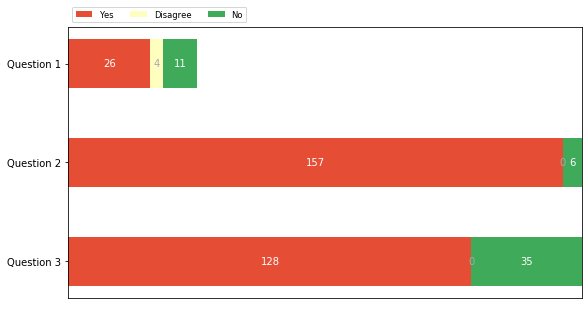

In [37]:
category_names = ['Yes', 'Disagree', 'No']


sizes = [26,4,11]
sizes2 = [157,0,6]
sizes3 = [128,0,35]





results = {
    'Question 1': sizes,
    'Question 2': sizes2,
    'Question 3': sizes3
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [36]:
print(sizes3)

[128  35]
